In [1]:
%matplotlib widget

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import html5lib
from bs4 import BeautifulSoup
import requests
import datetime

In [3]:
diainicio = datetime.datetime(2019, 1, 1)
diafinal = datetime.datetime(2022, 4, 19)
print(diafinal > diainicio)

True


In [26]:
pagina = requests.get('https://www.gov.br/planalto/pt-br/acompanhe-o-planalto/agenda-do-presidente-da-republica/2019-04-07') 
soup = BeautifulSoup(pagina.text, 'html.parser')
list1 = soup.find_all('time')
list2 = soup.find_all('h2', {"class": "compromisso-titulo"})
controle = soup.find_all('div', {"class": "portalMessage info"})

In [4]:
data = []
horario = []
descricao = []

In [5]:
#Loop Extrator
while diainicio <= diafinal:
    #preparo do scrapper    
    url = 'https://www.gov.br/planalto/pt-br/acompanhe-o-planalto/agenda-do-presidente-da-republica/' + diainicio.strftime('%Y-%m-%d')
    
    #Controle de conexão
    try:
        pagina = requests.get(url) 
    except:
        data.append(diainicio.strftime('%Y-%m-%d'))
        horario.append('00h00/00h00')
        descricao.append('Erro na conexão do scrapper')
        diainicio += datetime.timedelta(days=1)
        continue
    
    #conseguindo html
    soup = BeautifulSoup(pagina.text, 'html.parser')
    
    #extraindo inicio e fim dos compromissos
    inicio = soup.find_all('time', {"class": "compromisso-inicio"})
    final = soup.find_all('time', {"class": "compromisso-fim"})
    
    #extraindo descrição
    list2 = soup.find_all('h2', {"class": "compromisso-titulo"})
    
    #controle de inputs fora do padrão
    controle = soup.find_all('div', {"class": "portalMessage info"})
    
    #controle de input fora do padrão + falta de descrição
    if len(controle) > 0 and len(list2) == 0:
        data.append(diainicio.strftime('%Y-%m-%d'))
        horario.append('00h00/00h00')
        descricao.append('Sem compromisso oficial')
        diainicio += datetime.timedelta(days=1)
        continue
    else:
        try:
            if len(inicio) == 0 or len(final) == 0:
                data.append(diainicio.strftime('%Y-%m-%d'))
                horario.append('00h00/00h00')
                descricao.append('Sem compromisso oficial')
                diainicio += datetime.timedelta(days=1)
                continue
        except:
            data.append(diainicio.strftime('%Y-%m-%d'))
            horario.append('00h00/00h00')
            descricao.append('Sem compromisso oficial')
            diainicio += datetime.timedelta(days=1)
            continue
    
    #controle de erros da extração de horários com a descrição
    diferencadesc = []
    if len(inicio) != len(list2) or len(final) != len(list2):
        diferencadesc.append(diainicio.strftime('%Y-%m-%d'))
        diainicio += datetime.timedelta(days=1)
        continue
    
    #controle de erros da extração de horários de início e final
    diferencatemp = []
    #loop extrator horário
    if len(inicio) == len(final):
        for x in range(0 ,len(inicio)):
            inifim = inicio[x].text + '/' + final[x].text
            horario.append(inifim)
    else:
        diferencatemp.append(diainicio.strftime('%Y-%m-%d'))
        diainicio += datetime.timedelta(days=1)
        continue
    
    #loop extrator descrição
    for x in range(len(list2)):
        descricao.append(list2[x].text)
    
    #loop extrator data
    for x in range(len(list2)):
        data.append(diainicio.strftime('%Y-%m-%d'))
    
    #controle final do while loop
    diainicio += datetime.timedelta(days=1)
    

In [6]:
diferencadesc

['2022-04-19']

In [7]:
diferencatemp

[]

In [8]:
len(data)

5647

In [9]:
horario[1]


'09h00/10h00'

In [10]:
len(descricao)

5647

In [11]:
data[5640]

'2022-04-16'

In [12]:
diainicio = datetime.datetime(2019, 1, 1)
diafinal = datetime.datetime(2022, 4, 19)

teste = []
for element in data:
    lista = element.split('-')
    teste.append(datetime.datetime(int(lista[0]),int(lista[1]), int(lista[2])))

In [13]:
datasnaopuxadas = []
while diainicio <= diafinal:
    if diainicio not in teste:
        datasnaopuxadas.append(diainicio)
    
    diainicio += datetime.timedelta(days=1)

In [14]:
datasnaopuxadas

[datetime.datetime(2019, 1, 14, 0, 0),
 datetime.datetime(2019, 1, 20, 0, 0),
 datetime.datetime(2019, 1, 21, 0, 0),
 datetime.datetime(2019, 1, 24, 0, 0),
 datetime.datetime(2019, 1, 26, 0, 0),
 datetime.datetime(2019, 2, 26, 0, 0),
 datetime.datetime(2019, 3, 19, 0, 0),
 datetime.datetime(2019, 5, 14, 0, 0),
 datetime.datetime(2019, 5, 16, 0, 0),
 datetime.datetime(2019, 6, 6, 0, 0),
 datetime.datetime(2019, 6, 13, 0, 0),
 datetime.datetime(2019, 6, 15, 0, 0),
 datetime.datetime(2019, 6, 25, 0, 0),
 datetime.datetime(2019, 6, 27, 0, 0),
 datetime.datetime(2019, 6, 29, 0, 0),
 datetime.datetime(2019, 7, 9, 0, 0),
 datetime.datetime(2019, 8, 5, 0, 0),
 datetime.datetime(2019, 8, 6, 0, 0),
 datetime.datetime(2019, 9, 24, 0, 0),
 datetime.datetime(2019, 9, 25, 0, 0),
 datetime.datetime(2019, 10, 12, 0, 0),
 datetime.datetime(2019, 10, 20, 0, 0),
 datetime.datetime(2019, 10, 28, 0, 0),
 datetime.datetime(2019, 10, 30, 0, 0),
 datetime.datetime(2019, 11, 5, 0, 0),
 datetime.datetime(2020, 

In [15]:
len(datasnaopuxadas)

39

In [16]:
#Estimativa de tempo gasto dia a dia de todas as datas não puxadas.
horarioplus = ['03h25', '01h00', '07h30', '5h50', '01h35', '03h25', '06h10', '08h30', '05h10', '05h00', '06h00', '05h00', '06h00', '00h30', 
'06h00', '07h00', '05h00', '06h00', '02h00', '05h00', '04h00', '00h00', '06h00', '04h00', '04h00', '00h00', '04h00', '05h00', '04h30', '05h00', '04h00', 
'00h30', '04h00', '02h00', '04h00', '00h30', '04h00', '05h00', '04h00']

In [17]:
len(horarioplus)

39

In [18]:
type(datasnaopuxadas[0])

datetime.datetime

In [19]:
for x in range(len(datasnaopuxadas)):
    data.append(datasnaopuxadas[x].strftime('%Y-%m-%d'))
    horario.append('00h00/' + horarioplus[x])
    descricao.append('-')

In [20]:
len(data)

5686

In [21]:
len(horario)

5686

In [22]:
len(descricao)

5686

In [23]:
print(descricao[5685])

-


In [24]:
col = ['Data', 'Horario', 'Descrição']
df = pd.DataFrame(columns=col)

In [25]:
df['Data'] = data

In [26]:
df['Horario'] = horario

In [27]:
df['Descrição'] = descricao

In [28]:
df

,Data,Horario,Descrição
0,2019-01-01,15h00/18h00,Solenidade de Posse
1,2019-01-02,09h00/10h00,Cerimônia de transmissão do cargo de Ministro-...
2,2019-01-02,10h00/10h45,"Mike Pompeo, Ministro das Relações Exteriores ..."
3,2019-01-02,10h45/11h15,"Marcelo Rebelo de Sousa, Presidente de Portugal"
4,2019-01-02,11h15/12h00,"Viktor Orban, Primeiro Ministro da Hungria"
...,...,...,...
5681,2021-11-16,00h00/04h00,-
5682,2022-02-14,00h00/00h30,-
5683,2022-02-17,00h00/04h00,-
5684,2022-03-18,00h00/05h00,-


In [29]:
df[df['Descrição'] == 'Erro na conexão do scrapper']

,Data,Horario,Descrição


In [35]:
df[df['Data'] == '2021-05-01']

,Data,Horario,Descrição
4297,2021-05-01,00h00/00h00,Sem compromisso oficial


In [48]:
def diff(string):
    list = string.split('/')
    timea = datetime.datetime.strptime(list[0], '%Hh%M')
    timeb = datetime.datetime.strptime(list[1], '%Hh%M')
    return (timeb-timea).total_seconds() / 60

In [49]:
df['Minutos trabalhados'] = df['Horario'].apply(lambda x: diff(x))

In [50]:
df

,Data,Horario,Descrição,Minutos trabalhados
0,2019-01-01,15h00/18h00,Solenidade de Posse,180.0
1,2019-01-02,09h00/10h00,Cerimônia de transmissão do cargo de Ministro-...,60.0
2,2019-01-02,10h00/10h45,"Mike Pompeo, Ministro das Relações Exteriores ...",45.0
3,2019-01-02,10h45/11h15,"Marcelo Rebelo de Sousa, Presidente de Portugal",30.0
4,2019-01-02,11h15/12h00,"Viktor Orban, Primeiro Ministro da Hungria",45.0
...,...,...,...,...
5681,2021-11-16,00h00/04h00,-,240.0
5682,2022-02-14,00h00/00h30,-,30.0
5683,2022-02-17,00h00/04h00,-,240.0
5684,2022-03-18,00h00/05h00,-,300.0


In [51]:
df[df['Data'] == '2021-05-01'] 

,Data,Horario,Descrição,Minutos trabalhados
4297,2021-05-01,00h00/00h00,Sem compromisso oficial,0.0


In [68]:
teste = datetime.datetime(2022, 4, 22)

In [71]:
teste.strftime('%A')

'Friday'

In [74]:
def sabado(string):
    dia = datetime.datetime.strptime(string, '%Y-%m-%d')
    return True if dia.strftime('%A') == 'Saturday' else False
def domingo(string):
    dia = datetime.datetime.strptime(string, '%Y-%m-%d')
    return True if dia.strftime('%A') == 'Sunday' else False

In [75]:
df['Sábado?'] = df['Data'].apply(lambda x: sabado(x))
df['Domingo?'] = df['Data'].apply(lambda x: domingo(x))

In [76]:
df

,Data,Horario,Descrição,Minutos trabalhados,Sábado?,Domingo?
0,2019-01-01,15h00/18h00,Solenidade de Posse,180.0,False,False
1,2019-01-02,09h00/10h00,Cerimônia de transmissão do cargo de Ministro-...,60.0,False,False
2,2019-01-02,10h00/10h45,"Mike Pompeo, Ministro das Relações Exteriores ...",45.0,False,False
3,2019-01-02,10h45/11h15,"Marcelo Rebelo de Sousa, Presidente de Portugal",30.0,False,False
4,2019-01-02,11h15/12h00,"Viktor Orban, Primeiro Ministro da Hungria",45.0,False,False
...,...,...,...,...,...,...
5681,2021-11-16,00h00/04h00,-,240.0,False,False
5682,2022-02-14,00h00/00h30,-,30.0,False,False
5683,2022-02-17,00h00/04h00,-,240.0,False,False
5684,2022-03-18,00h00/05h00,-,300.0,False,False


In [77]:
df[df['Data'] == '2022-04-16']

,Data,Horario,Descrição,Minutos trabalhados,Sábado?,Domingo?
5640,2022-04-16,00h00/00h00,Sem compromisso oficial,0.0,True,False


In [78]:
df[df['Data'] == '2022-04-17'] 

,Data,Horario,Descrição,Minutos trabalhados,Sábado?,Domingo?
5641,2022-04-17,00h00/00h00,Sem compromisso oficial,0.0,False,True


In [83]:
somadias = df.groupby('Data')['Minutos trabalhados'].sum()
somasemdomingo = df[df['Domingo?'] == False].groupby('Data')['Minutos trabalhados'].sum()
somasemsabdom = df[(df['Domingo?'] == False) & (df['Sábado?'] == False)].groupby('Data')['Minutos trabalhados'].sum()

In [90]:
somasemsabdom

Data
2019-01-01    180.0
2019-01-02    255.0
2019-01-03    370.0
2019-01-04    300.0
2019-01-07    430.0
              ...  
2022-04-13    135.0
2022-04-14    260.0
2022-04-15      0.0
2022-04-18    180.0
2022-04-19    240.0
Name: Minutos trabalhados, Length: 861, dtype: float64

In [91]:
mediatotal = somadias.sum() / len(somadias)
mediasemdomingo = somasemdomingo.sum() / len(somasemdomingo)
mediasemsabdom = somasemsabdom.sum() / len(somasemsabdom)

In [92]:
mediatotal

222.00995850622408

In [93]:
mediasemdomingo

251.5217812197483

In [94]:
mediasemsabdom

285.79442508710804

In [100]:
d = {'Media com todos dias da semana': [mediatotal],
      'Media sem contabilizar domingo': [mediasemdomingo],
      'Media sem contabilizar sábado e domingo': [mediasemsabdom]}

dfmedia = pd.DataFrame(data=d)

In [101]:
dfmedia

,Media com todos dias da semana,Media sem contabilizar domingo,Media sem contabilizar sábado e domingo
0,222.009959,251.521781,285.794425


In [107]:
dfmedia = dfmedia.transpose()

In [115]:
dfmedia.rename(columns={0:'Média de minutos diários'}, inplace=True)

In [116]:
dfmedia

,Média de minutos diários
Media com todos dias da semana,222.009959
Media sem contabilizar domingo,251.521781
Media sem contabilizar sábado e domingo,285.794425


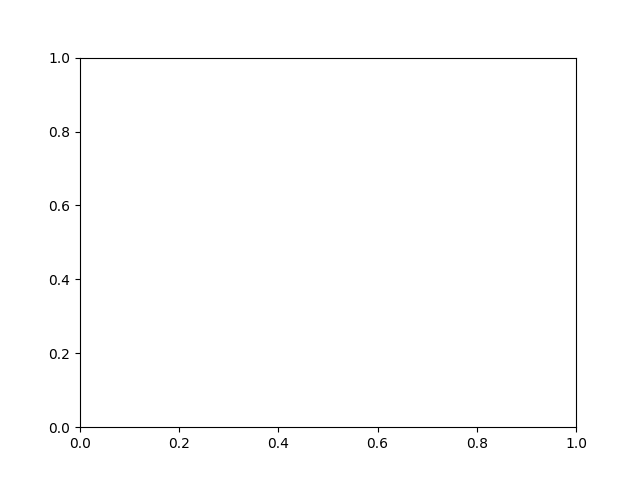

In [118]:
fig, ax = plt.subplots()

<AxesSubplot:>

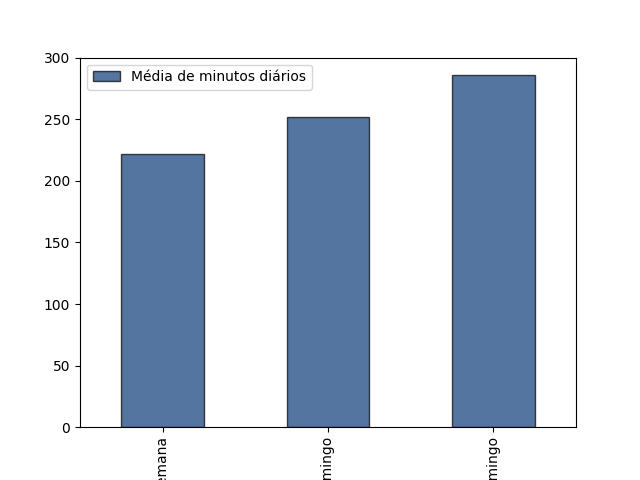

In [119]:
dfmedia.plot.bar(ax=ax, color='#0D3A7A', alpha=0.7, edgecolor='k', linewidth='1')

In [122]:
plt.xticks(rotation=0, ha='center', color='k')
ax.set_title('Média de minutos diários gastos por Jair Bolsonaro em compromissos oficiais')

Text(0.5, 1.0, 'Média de minutos diários gastos por Jair Bolsonaro em compromissos oficiais')

In [124]:
ax.set_ylabel('Minutos')

Text(94.97222222222221, 0.5, 'Minutos')